In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

In [2]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
def plotDf(df, layOut=(4,4)):
    df.plot(kind='line', subplots=True, layout=layOut, figsize=(22,50))
    plt.show()
    
def normalize(a):
    return (a-a.min())/(a.max()-a.min())

In [5]:
df = pd.read_csv("training.csv")

In [6]:
df.Label.value_counts()

Benign    631275
ddos      129152
Name: Label, dtype: int64

In [7]:
dfddos = df[df["Label"]=="ddos"]
dfbenign = df[df["Label"]=="Benign"]

In [8]:
dfddos.Label.value_counts(), dfbenign.Label.value_counts()

(ddos    129152
 Name: Label, dtype: int64,
 Benign    631275
 Name: Label, dtype: int64)

In [9]:
dfddos = dfddos.sample(frac=1, random_state=42).reset_index(drop=True)

In [10]:
dfbenign = dfbenign.sample(n=129152, random_state=42).reset_index(drop=True)

In [11]:
dfddos.Label.value_counts(), dfbenign.Label.value_counts()

(ddos    129152
 Name: Label, dtype: int64,
 Benign    129152
 Name: Label, dtype: int64)

In [12]:
len(dfddos.columns)/3

28.333333333333332

In [13]:
df2 = dfddos.append(dfbenign)

In [14]:
len(dfddos)

129152

In [15]:
vc = dfddos['Subflow Bwd Pkts'].value_counts()
vc[:35]
# vc[vc < 110].plot.hist(bins=100)

1        56307
4        32771
3        18515
5         9920
0         5831
6         2816
2         2319
7          428
8           83
9           33
10          31
18          13
20           9
16           9
11           8
12           7
13           6
15           5
14           3
44           3
17           3
73           2
40           2
57           2
25           2
26           2
28730        1
71           1
134          1
58           1
114          1
35           1
691          1
171          1
224          1
Name: Subflow Bwd Pkts, dtype: int64

In [16]:
vc = dfbenign['Subflow Bwd Pkts'].value_counts()
vc[:35]
# vc[vc < 150].plot.hist(bins=150)

1     47478
0     23512
7     12802
2     10262
4      7753
8      3670
3      3534
5      2624
9      2535
14     1729
6      1363
10     1249
11     1229
15     1092
16     1004
12      977
13      788
17      769
18      604
19      482
20      429
21      318
22      205
25      141
23      140
24      113
28       99
26       95
27       89
29       88
30       86
31       81
33       77
32       69
36       50
Name: Subflow Bwd Pkts, dtype: int64

In [16]:
dfbenign[['Tot Fwd Pkts']]

Tot Fwd Pkts
0                  0
1                  6
2                 10
3                 19
4                  5
...              ...
129147             6
129148            11
129149             1
129150             3
129151             1

[129152 rows x 1 columns]

In [17]:
vc

1       47478
0       23512
7       12802
2       10262
4        7753
        ...  
441         1
1051        1
347         1
219         1
255         1
Name: Subflow Bwd Pkts, Length: 332, dtype: int64

In [17]:
df2[['Active Mean','Active Std','Active Max','Active Min']].apply(pd.Series.value_counts)
df2[['Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']].apply(pd.Series.value_counts)
df2[['Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min']].apply(pd.Series.value_counts)

Init Fwd Win Byts  Init Bwd Win Byts  Fwd Act Data Pkts  \
-1                169548.0            73639.0                NaN   
 0                   770.0             9725.0           131956.0   
 1                     NaN                NaN            85852.0   
 2                     NaN                NaN             1422.0   
 3                     NaN                2.0             5894.0   
...                    ...                ...                ...   
 150210                NaN                NaN                1.0   
 152272                NaN                NaN                1.0   
 154683                NaN                NaN                1.0   
 160438                NaN                NaN                1.0   
 178834                NaN                NaN                1.0   

         Fwd Seg Size Min  
-1                    NaN  
 0               128477.0  
 1                    NaN  
 2                    NaN  
 3                    NaN  
...                   ...  
 150210               NaN  
 152272               NaN  
 154683               NaN  
 160438               NaN  
 178834               NaN  

[3000 rows x 4 columns]

In [19]:
df

Unnamed: 0                                  Flow ID          Src IP  \
0          1891912      172.31.69.28-18.219.5.43-80-53734-6    172.31.69.28   
1           847148    172.31.69.25-18.219.193.20-80-43072-6   18.219.193.20   
2          1661439    172.31.69.25-18.219.193.20-80-41464-6   18.219.193.20   
3          1346670    172.31.69.28-18.218.55.126-80-64285-6    172.31.69.28   
4          1700729    172.31.69.25-18.219.193.20-80-40198-6   18.219.193.20   
...            ...                                      ...             ...   
760422     7607442   172.31.65.69-5.39.216.195-3389-47407-6    172.31.65.69   
760423     4812152     172.31.67.45-52.54.15.82-52451-443-6    172.31.67.45   
760424     1421512      172.31.0.2-172.31.66.63-53-55913-17    172.31.66.63   
760425     1725894   172.31.67.50-209.85.203.113-53598-80-6  209.85.203.113   
760426     7656685  169.254.169.254-172.31.65.89-80-49393-6    172.31.65.89   

        Src Port           Dst IP  Dst Port  Protocol               Timestamp  \
0             80      18.219.5.43     53734         6  22/02/2018 12:17:29 AM   
1          43072     172.31.69.25        80         6  16/02/2018 11:20:48 PM   
2          41464     172.31.69.25        80         6  16/02/2018 11:26:54 PM   
3             80    18.218.55.126     64285         6  21/02/2018 11:52:06 PM   
4          40198     172.31.69.25        80         6  16/02/2018 11:27:12 PM   
...          ...              ...       ...       ...                     ...   
760422      3389     5.39.216.195     47407         6     20/02/2018 01:57:16   
760423     52451      52.54.15.82       443         6     20/02/2018 04:32:52   
760424     55913       172.31.0.2        53        17     20/02/2018 01:27:21   
760425        80     172.31.67.50     53598         6     20/02/2018 05:14:52   
760426     49393  169.254.169.254        80         6     20/02/2018 09:55:40   

        Flow Duration  Tot Fwd Pkts  ...  Fwd Seg Size Min    Active Mean  \
0                1461             4  ...                 0       0.000000   
1               13813             1  ...                 0       0.000000   
2                 483             1  ...                 0       0.000000   
3                1341             4  ...                 0       0.000000   
4                 676             1  ...                 0       0.000000   
...               ...           ...  ...               ...            ...   
760422       83878000             2  ...                20       0.000000   
760423       59368052            18  ...                20  102743.833333   
760424           5758             1  ...                 8       0.000000   
760425             50             1  ...                20       0.000000   
760426             54             2  ...                20       0.000000   

           Active Std  Active Max  Active Min     Idle Mean       Idle Std  \
0            0.000000         0.0         0.0  0.000000e+00       0.000000   
1            0.000000         0.0         0.0  0.000000e+00       0.000000   
2            0.000000         0.0         0.0  0.000000e+00       0.000000   
3            0.000000         0.0         0.0  0.000000e+00       0.000000   
4            0.000000         0.0         0.0  0.000000e+00       0.000000   
...               ...         ...         ...           ...            ...   
760422       0.000000         0.0         0.0  8.387800e+07       0.000000   
760423  149428.156761    362731.0     11651.0  9.761993e+06  777888.388539   
760424       0.000000         0.0         0.0  0.000000e+00       0.000000   
760425       0.000000         0.0         0.0  0.000000e+00       0.000000   
760426       0.000000         0.0         0.0  0.000000e+00       0.000000   

          Idle Max    Idle Min   Label  
0              0.0         0.0    ddos  
1              0.0         0.0    ddos  
2              0.0         0.0    ddos  
3              0.0         0.0    ddos  
4              0.0 

In [17]:
dfddos[['Subflow Fwd Pkts']].apply(pd.Series.value_counts)

Subflow Fwd Pkts
4                  52267
1                  50978
2                  14937
3                   7824
0                   2511
...                  ...
38                     1
39                     1
127446                 1
233                    1
80496                  1

[101 rows x 1 columns]

In [18]:
dfbenign[['Subflow Fwd Pkts']].apply(pd.Series.value_counts)

Subflow Fwd Pkts
1                42757
2                26126
3                15053
8                 8391
9                 6051
...                ...
91                   1
439                  1
2267                 1
759                  1
2878                 1

[243 rows x 1 columns]

In [14]:
# df2.apply(pd.Series.value_counts)

In [20]:
[x for x in list(df2.columns) if x not in list(empties1)]

['Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Flow Pkts/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Bwd PSH Flags',
 'Fwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'Pkt Len Var',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Subflow Fwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Bwd Byts',
 'Label']

In [18]:
## maybes = ['Flow Duration', 'Down/Up Ratio']
empties1 = [
    'Down/Up Ratio',
    'Src Port', 'Dst Port', 'Protocol', ## cant include because synthetic and not meaningful
    'Unnamed: 0', 'Flow ID', 'Timestamp', 'Src IP', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port',
    
    'Active Mean', 'Active Std', 'Active Max', 'Active Min',
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min',
    'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', ## maybes
    
    'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 
    'CWE Flag Count', 'ECE Flag Cnt', ## almost good for benign
    
#     'Tot Bwd Pkts', 'TotLen Bwd Pkts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts' ## these seem like they have a distribution
    'Fwd Pkt Len Min', 'Flow Byts/s', 'Fwd PSH Flags', 'Fwd URG Flags',
    'Bwd URG Flags', 'Bwd Header Len', 'URG Flag Cnt','Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
    'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 
]

df3 = df2.drop(empties1, axis=1)
df3

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0             4075407             4             4            935.0   
1               41908             1             1              0.0   
2               14052             1             1              0.0   
3             3314380             4             4            935.0   
4               93598             4             3            935.0   
...               ...           ...           ...              ...   
129147       45389692             6             5              5.0   
129148        2711870            11             7           1148.0   
129149         140253             1             3             29.0   
129150      112637195             3             0              0.0   
129151            328             1             1             46.0   

        TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Mean  Fwd Pkt Len Std  \
0                 350.0            935.0        233.750000       467.500000   
1                   0.0              0.0          0.000000         0.000000   
2                   0.0              0.0          0.000000         0.000000   
3                 369.0            935.0        233.750000       467.500000   
4                 339.0            935.0        233.750000       467.500000   
...                 ...              ...               ...              ...   
129147              0.0              1.0          0.833333         0.408248   
129148           1581.0            677.0        104.363636       202.294475   
129149            187.0             29.0         29.000000         0.000000   
129150              0.0              0.0          0.000000         0.000000   
129151             62.0             46.0         46.000000         0.000000   

        Bwd Pkt Len Max  Bwd Pkt Len Min  ...  Pkt Len Std    Pkt Len Var  \
0                 350.0              0.0  ...   318.836862  101656.944444   
1                   0.0              0.0  ...     0.000000       0.000000   
2                   0.0              0.0  ...     0.000000       0.000000   
3                 369.0              0.0  ...   320.439325  102681.361111   
4                 339.0              0.0  ...   335.146343  112323.071429   
...                 ...              ...  ...          ...            ...   
129147              0.0              0.0  ...     0.522233       0.272727   
129148           1173.0              0.0  ...   298.520279   89114.356725   
129149             79.0             29.0  ...    27.386128     750.000000   
129150              0.0              0.0  ...     0.000000       0.000000   
129151             62.0             62.0  ...     9.237604      85.333333   

        Pkt Size Avg  Fwd Seg Size Avg  Bwd Seg Size Avg  Subflow Fwd Pkts  \
0         160.625000        233.750000         87.500000                 4   
1           0.000000          0.000000          0.000000                 1   
2           0.000000          0.000000          0.000000                 1   
3         163.000000        233.750000         92.250000                 4   
4         182.000000        233.750000        113.000000                 4   
...              ...               ...               ...               ...   
129147      0.545455          0.833333          0.000000                 6   
129148    151.611111        104.363636        225.857143                11   
129149     61.250000         29.000000         62.333333                 1   
129150      0.000000          0.000000          0.000000                 3   
129151     77.000000         46.000000         62.000000                 1   

        Subflow Fwd Byts  Subflow Bwd Pkts  Subflow Bwd Byts   Label  
0                    935                 4               350    ddos  
1                      0                 1                 0    ddos  
2                      0                 1                 0    ddos  
3                    935                 4               369    ddos  
4

In [35]:
dfit = df2[df2['Fwd IAT Tot']== 0]
dtfp = df2[df2['Tot Fwd Pkts']==1]

In [36]:
dfit

Unnamed: 0                                 Flow ID         Src IP  \
1          1220587      172.31.69.28-18.219.9.1-80-62302-6     18.219.9.1   
2           659422   172.31.69.28-52.14.136.135-80-54938-6  52.14.136.135   
6           898947   172.31.69.25-18.219.193.20-80-43964-6  18.219.193.20   
7           218666   172.31.69.25-18.219.193.20-80-50122-6  18.219.193.20   
10         1684657   172.31.69.25-18.219.193.20-80-52908-6  18.219.193.20   
...            ...                                     ...            ...   
129143      844438     172.31.0.2-172.31.64.84-53-49788-17   172.31.64.84   
129144      221442   192.168.10.3-192.168.10.9-53-62282-17   192.168.10.9   
129145     5915347     172.31.69.8-23.219.88.27-51617-80-6    172.31.69.8   
129149      445076  192.168.10.3-192.168.10.12-53-17631-17  192.168.10.12   
129151     4245345     172.31.0.2-172.31.66.81-53-60403-17   172.31.66.81   

        Src Port        Dst IP  Dst Port  Protocol               Timestamp  \
1          62302  172.31.69.28        80         6  22/02/2018 12:33:35 AM   
2          54938  172.31.69.28        80         6  22/02/2018 12:02:09 AM   
6          43964  172.31.69.25        80         6  16/02/2018 11:21:10 PM   
7          50122  172.31.69.25        80         6  16/02/2018 11:16:09 PM   
10         52908  172.31.69.25        80         6  16/02/2018 11:27:05 PM   
...          ...           ...       ...       ...                     ...   
129143     49788    172.31.0.2        53        17     20/02/2018 03:23:56   
129144     62282  192.168.10.3        53        17  03/07/2017 06:17:46 PM   
129145     51617  23.219.88.27        80         6     20/02/2018 10:55:03   
129149     17631  192.168.10.3        53        17  03/07/2017 10:29:29 PM   
129151     60403    172.31.0.2        53        17     20/02/2018 12:12:50   

        Flow Duration  Tot Fwd Pkts  ...  Fwd Seg Size Min  Active Mean  \
1               41908             1  ...                 0          0.0   
2               14052             1  ...                 0          0.0   
6                 344             1  ...                 0          0.0   
7               25765             1  ...                 0          0.0   
10               2053             1  ...                 0          0.0   
...               ...           ...  ...               ...          ...   
129143            380             1  ...                 8          0.0   
129144            155             1  ...                 0          0.0   
129145          38890             1  ...                20          0.0   
129149         140253             1  ...                 0          0.0   
129151            328             1  ...                 8          0.0   

        Active Std  Active Max  Active Min  Idle Mean  Idle Std  Idle Max  \
1              0.0         0.0         0.0        0.0       0.0       0.0   
2              0.0         0.0         0.0        0.0       0.0       0.0   
6              0.0         0.0         0.0        0.0       0.0       0.0   
7              0.0         0.0         0.0        0.0       0.0       0.0   
10             0.0         0.0         0.0        0.0       0.0       0.0   
...            ...         ...         ...        ...       ...       ...   
129143         0.0         0.0         0.0        0.0       0.0       0.0   
129144         0.0         0.0         0.0        0.0       0.0       0.0   
129145         0.0         0.0         0.0        0.0       0.0       0.0   
129149         0.0         0.0         0.0        0.0       0.0       0.0   
129151         0.0         0.0         0.0        0.0       0.0       0.0   

        Idle Min   Label  
1            0.0    ddos  
2            0.0    ddos  
6            0.0    ddos  
7            0.0    ddos  
10           0.0    ddos  
...          ...     ...  
129143       0.0  Benign  
129144       0.0  Benign  
129145       0.0  Benign  
129149       0.0  Benign  
129151       0.0  Benig

In [37]:
dtfp

Unnamed: 0                                 Flow ID         Src IP  \
1          1220587      172.31.69.28-18.219.9.1-80-62302-6     18.219.9.1   
2           659422   172.31.69.28-52.14.136.135-80-54938-6  52.14.136.135   
6           898947   172.31.69.25-18.219.193.20-80-43964-6  18.219.193.20   
7           218666   172.31.69.25-18.219.193.20-80-50122-6  18.219.193.20   
10         1684657   172.31.69.25-18.219.193.20-80-52908-6  18.219.193.20   
...            ...                                     ...            ...   
129143      844438     172.31.0.2-172.31.64.84-53-49788-17   172.31.64.84   
129144      221442   192.168.10.3-192.168.10.9-53-62282-17   192.168.10.9   
129145     5915347     172.31.69.8-23.219.88.27-51617-80-6    172.31.69.8   
129149      445076  192.168.10.3-192.168.10.12-53-17631-17  192.168.10.12   
129151     4245345     172.31.0.2-172.31.66.81-53-60403-17   172.31.66.81   

        Src Port        Dst IP  Dst Port  Protocol               Timestamp  \
1          62302  172.31.69.28        80         6  22/02/2018 12:33:35 AM   
2          54938  172.31.69.28        80         6  22/02/2018 12:02:09 AM   
6          43964  172.31.69.25        80         6  16/02/2018 11:21:10 PM   
7          50122  172.31.69.25        80         6  16/02/2018 11:16:09 PM   
10         52908  172.31.69.25        80         6  16/02/2018 11:27:05 PM   
...          ...           ...       ...       ...                     ...   
129143     49788    172.31.0.2        53        17     20/02/2018 03:23:56   
129144     62282  192.168.10.3        53        17  03/07/2017 06:17:46 PM   
129145     51617  23.219.88.27        80         6     20/02/2018 10:55:03   
129149     17631  192.168.10.3        53        17  03/07/2017 10:29:29 PM   
129151     60403    172.31.0.2        53        17     20/02/2018 12:12:50   

        Flow Duration  Tot Fwd Pkts  ...  Fwd Seg Size Min  Active Mean  \
1               41908             1  ...                 0          0.0   
2               14052             1  ...                 0          0.0   
6                 344             1  ...                 0          0.0   
7               25765             1  ...                 0          0.0   
10               2053             1  ...                 0          0.0   
...               ...           ...  ...               ...          ...   
129143            380             1  ...                 8          0.0   
129144            155             1  ...                 0          0.0   
129145          38890             1  ...                20          0.0   
129149         140253             1  ...                 0          0.0   
129151            328             1  ...                 8          0.0   

        Active Std  Active Max  Active Min  Idle Mean  Idle Std  Idle Max  \
1              0.0         0.0         0.0        0.0       0.0       0.0   
2              0.0         0.0         0.0        0.0       0.0       0.0   
6              0.0         0.0         0.0        0.0       0.0       0.0   
7              0.0         0.0         0.0        0.0       0.0       0.0   
10             0.0         0.0         0.0        0.0       0.0       0.0   
...            ...         ...         ...        ...       ...       ...   
129143         0.0         0.0         0.0        0.0       0.0       0.0   
129144         0.0         0.0         0.0        0.0       0.0       0.0   
129145         0.0         0.0         0.0        0.0       0.0       0.0   
129149         0.0         0.0         0.0        0.0       0.0       0.0   
129151         0.0         0.0         0.0        0.0       0.0       0.0   

        Idle Min   Label  
1            0.0    ddos  
2            0.0    ddos  
6            0.0    ddos  
7            0.0    ddos  
10           0.0    ddos  
...          ...     ...  
129143       0.0  Benign  
129144       0.0  Benign  
129145       0.0  Benign  
129149       0.0  Benign  
129151       0.0  Benig

In [45]:
df2[df2['Bwd IAT Tot']==0]

Unnamed: 0                                 Flow ID         Src IP  \
1          1220587      172.31.69.28-18.219.9.1-80-62302-6     18.219.9.1   
2           659422   172.31.69.28-52.14.136.135-80-54938-6  52.14.136.135   
5           513499   172.31.69.25-18.218.115.60-80-53526-6  18.218.115.60   
6           898947   172.31.69.25-18.219.193.20-80-43964-6  18.219.193.20   
7           218666   172.31.69.25-18.219.193.20-80-50122-6  18.219.193.20   
...            ...                                     ...            ...   
129143      844438     172.31.0.2-172.31.64.84-53-49788-17   172.31.64.84   
129145     5915347     172.31.69.8-23.219.88.27-51617-80-6    172.31.69.8   
129146     7142294  169.254.169.254-172.31.67.9-80-51527-6    172.31.67.9   
129150     1896080                   8.0.6.4-8.6.0.1-0-0-0        8.6.0.1   
129151     4245345     172.31.0.2-172.31.66.81-53-60403-17   172.31.66.81   

        Src Port           Dst IP  Dst Port  Protocol               Timestamp  \
1          62302     172.31.69.28        80         6  22/02/2018 12:33:35 AM   
2          54938     172.31.69.28        80         6  22/02/2018 12:02:09 AM   
5          53526     172.31.69.25        80         6     20/02/2018 10:56:52   
6          43964     172.31.69.25        80         6  16/02/2018 11:21:10 PM   
7          50122     172.31.69.25        80         6  16/02/2018 11:16:09 PM   
...          ...              ...       ...       ...                     ...   
129143     49788       172.31.0.2        53        17     20/02/2018 03:23:56   
129145     51617     23.219.88.27        80         6     20/02/2018 10:55:03   
129146     51527  169.254.169.254        80         6     20/02/2018 04:13:22   
129150         0          8.0.6.4         0         0     20/02/2018 12:06:17   
129151     60403       172.31.0.2        53        17     20/02/2018 12:12:50   

        Flow Duration  Tot Fwd Pkts  ...  Fwd Seg Size Min  Active Mean  \
1               41908             1  ...                 0          0.0   
2               14052             1  ...                 0          0.0   
5             4514451             2  ...                20          0.0   
6                 344             1  ...                 0          0.0   
7               25765             1  ...                 0          0.0   
...               ...           ...  ...               ...          ...   
129143            380             1  ...                 8          0.0   
129145          38890             1  ...                20          0.0   
129146            100             2  ...                20          0.0   
129150      112637195             3  ...                 0          0.0   
129151            328             1  ...                 8          0.0   

        Active Std  Active Max  Active Min   Idle Mean   Idle Std    Idle Max  \
1              0.0         0.0         0.0         0.0   0.000000         0.0   
2              0.0         0.0         0.0         0.0   0.000000         0.0   
5              0.0         0.0         0.0         0.0   0.000000         0.0   
6              0.0         0.0         0.0         0.0   0.000000         0.0   
7              0.0         0.0         0.0         0.0   0.000000         0.0   
...            ...         ...         ...         ...        ...         ...   
129143         0.0         0.0         0.0         0.0   0.000000         0.0   
129145         0.0         0.0         0.0         0.0   0.000000         0.0   
129146         0.0         0.0         0.0         0.0   0.000000         0.0   
129150         0.0         0.0         0.0  56318597.5  40.305087  56318626.0   
129151         0.0         0.0         0.0         0.0   0.000000         0.0   

          Idle Min   Label  
1              0.0    ddos  
2              0.0    ddos  
5              0.0    ddos  
6              0.0    ddos  
7              0.0    ddos  
...            ...     ...  
129143         0.0  Benign  
1291

In [27]:
len(df2)

258304

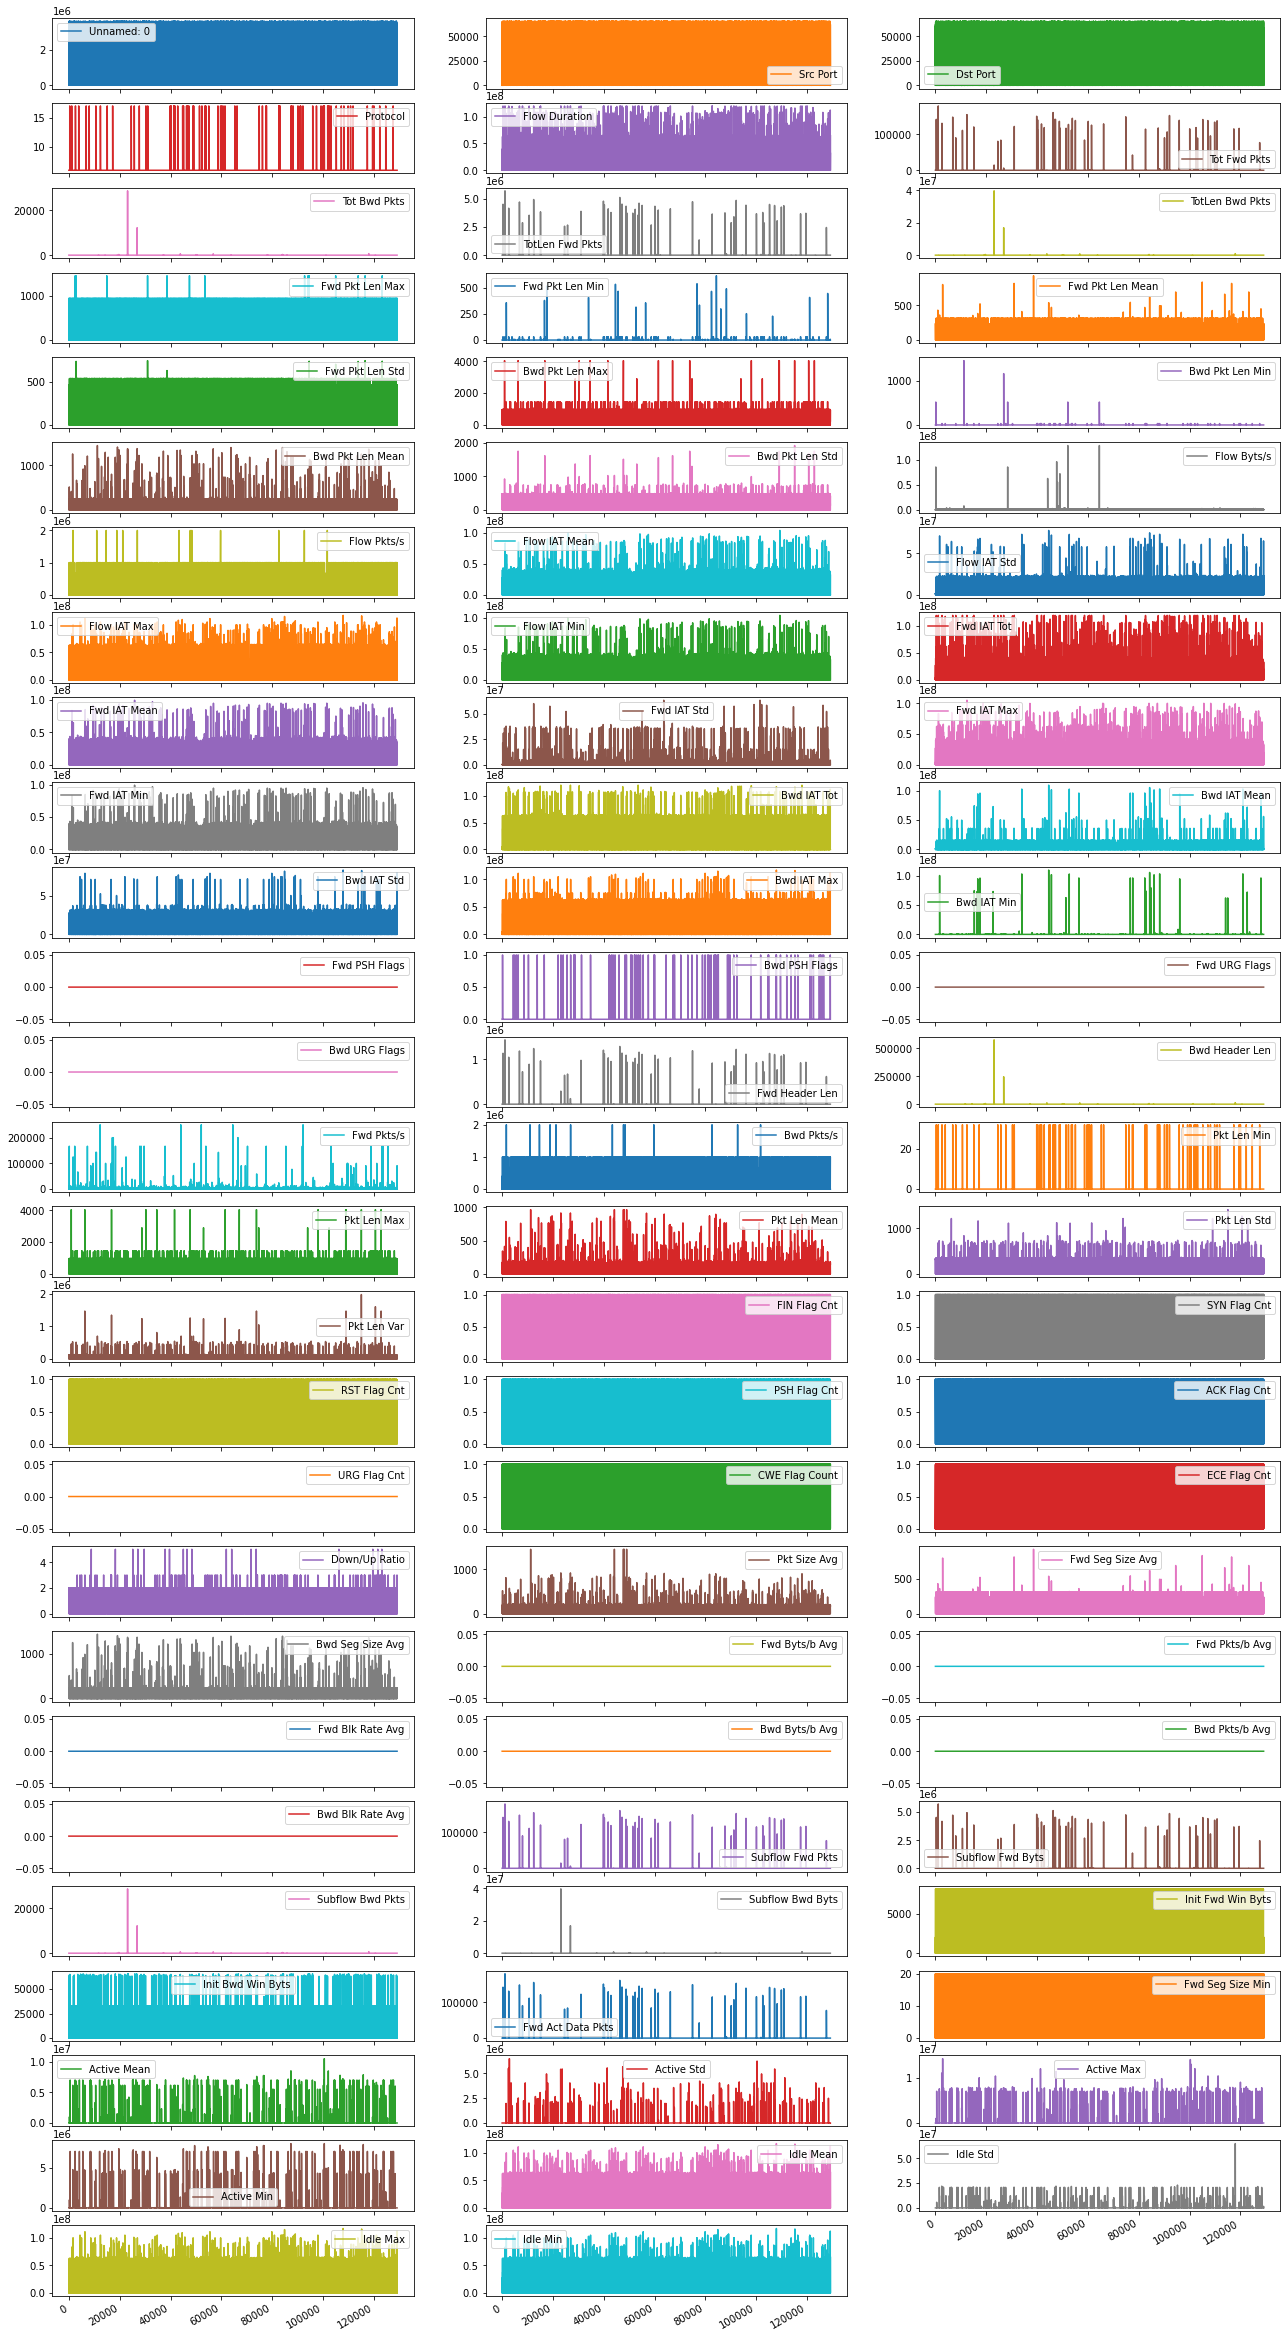

In [35]:
plotDf(dfddos, (29,3))

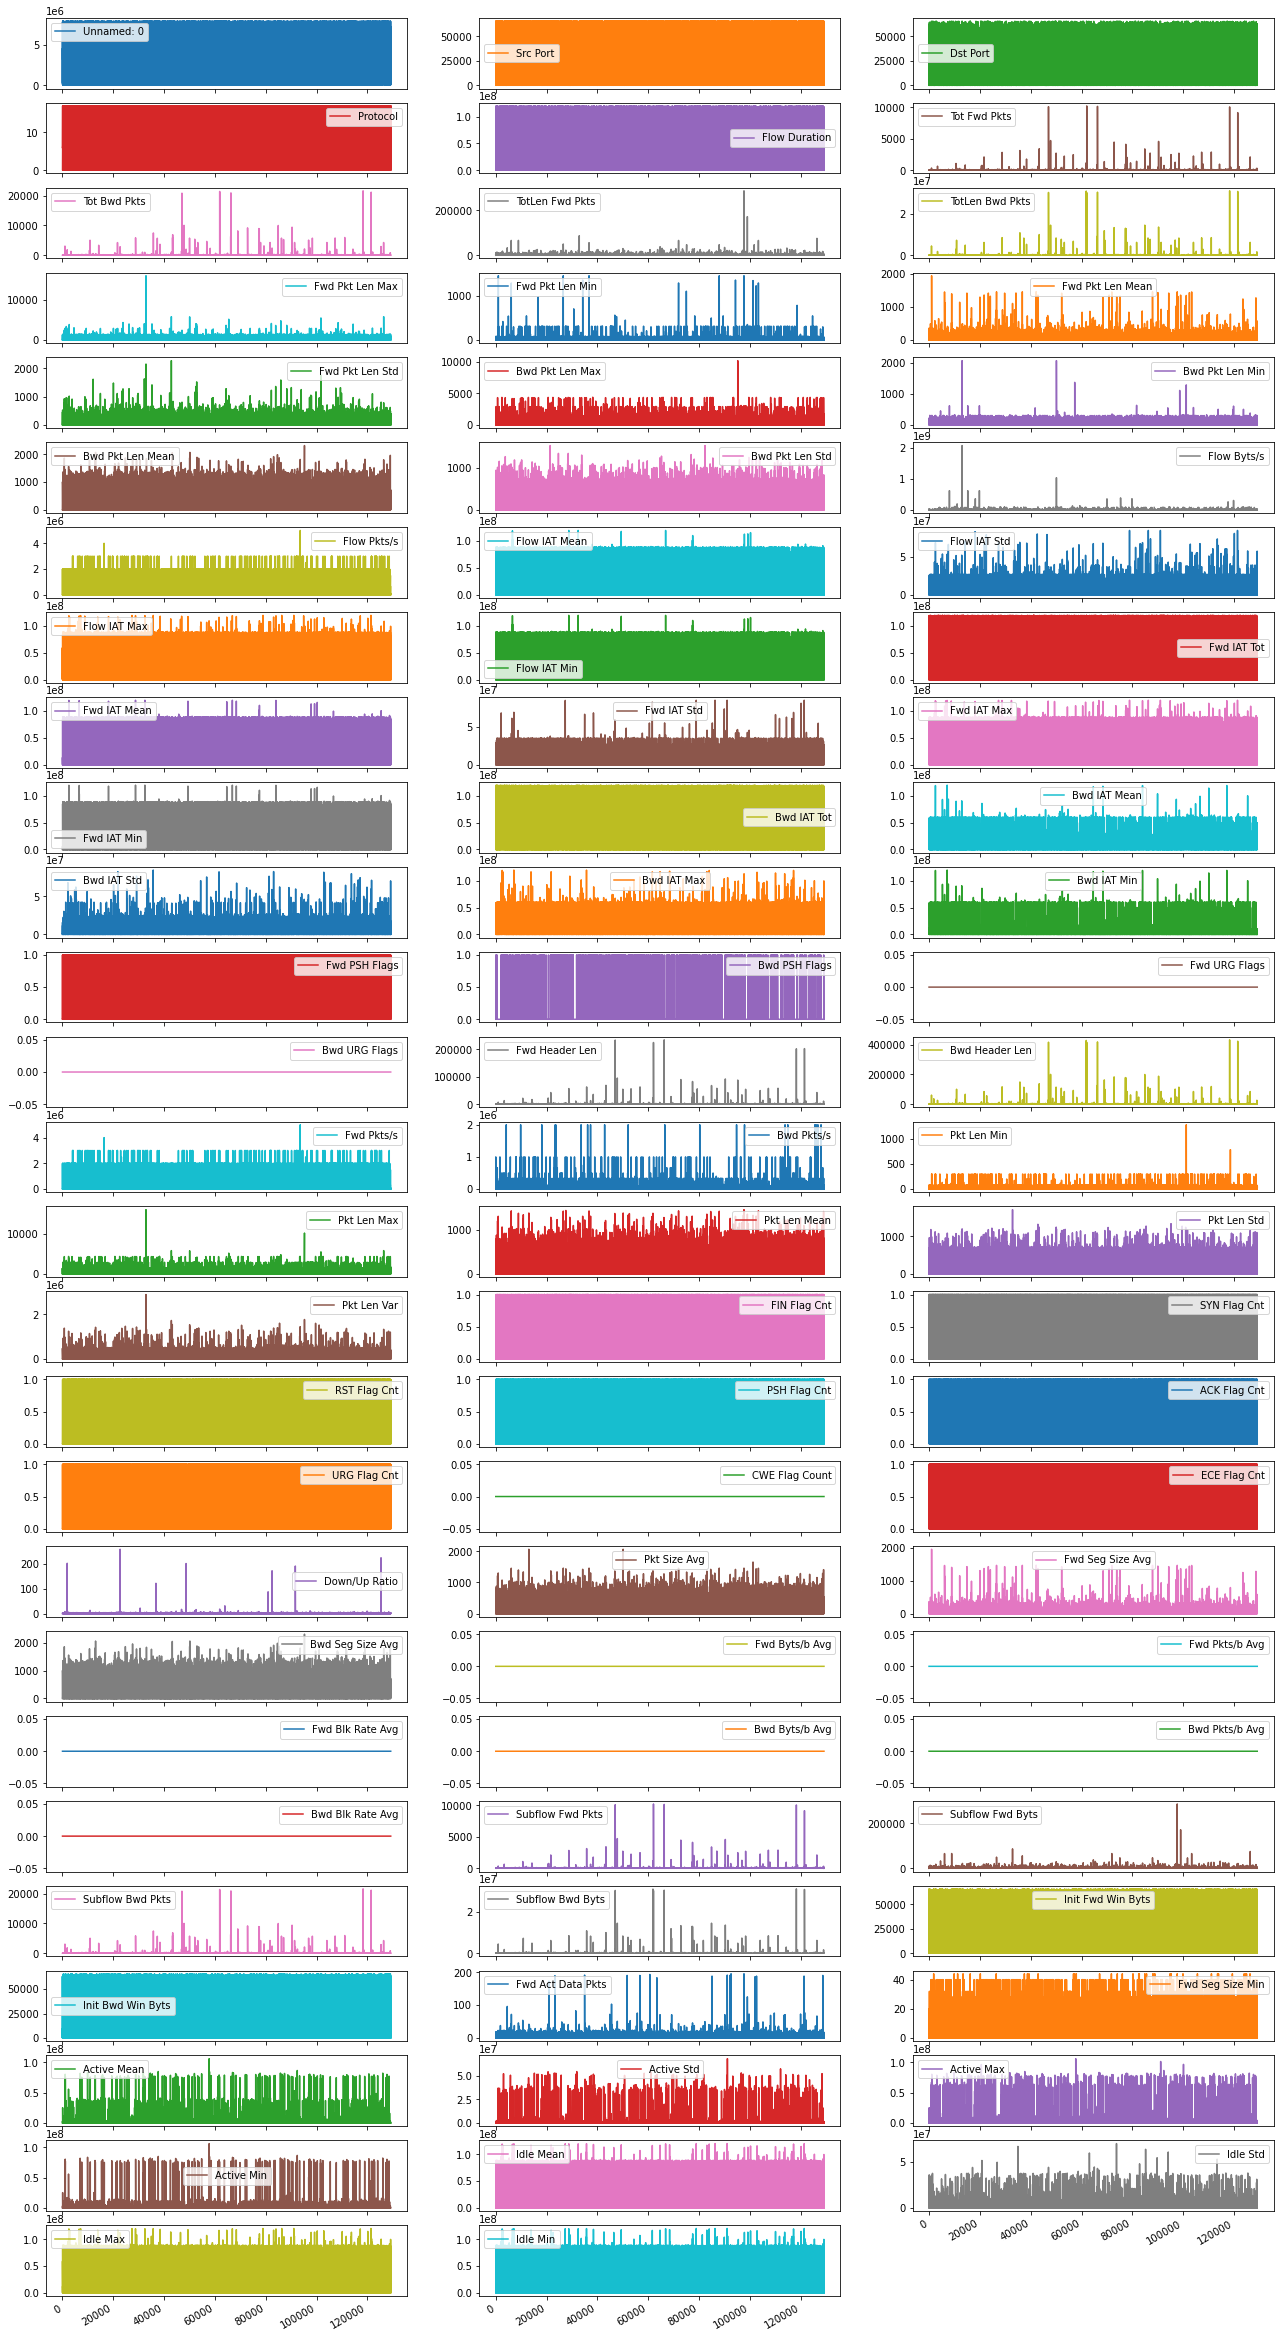

In [36]:
plotDf(dfbenign, (29,3))

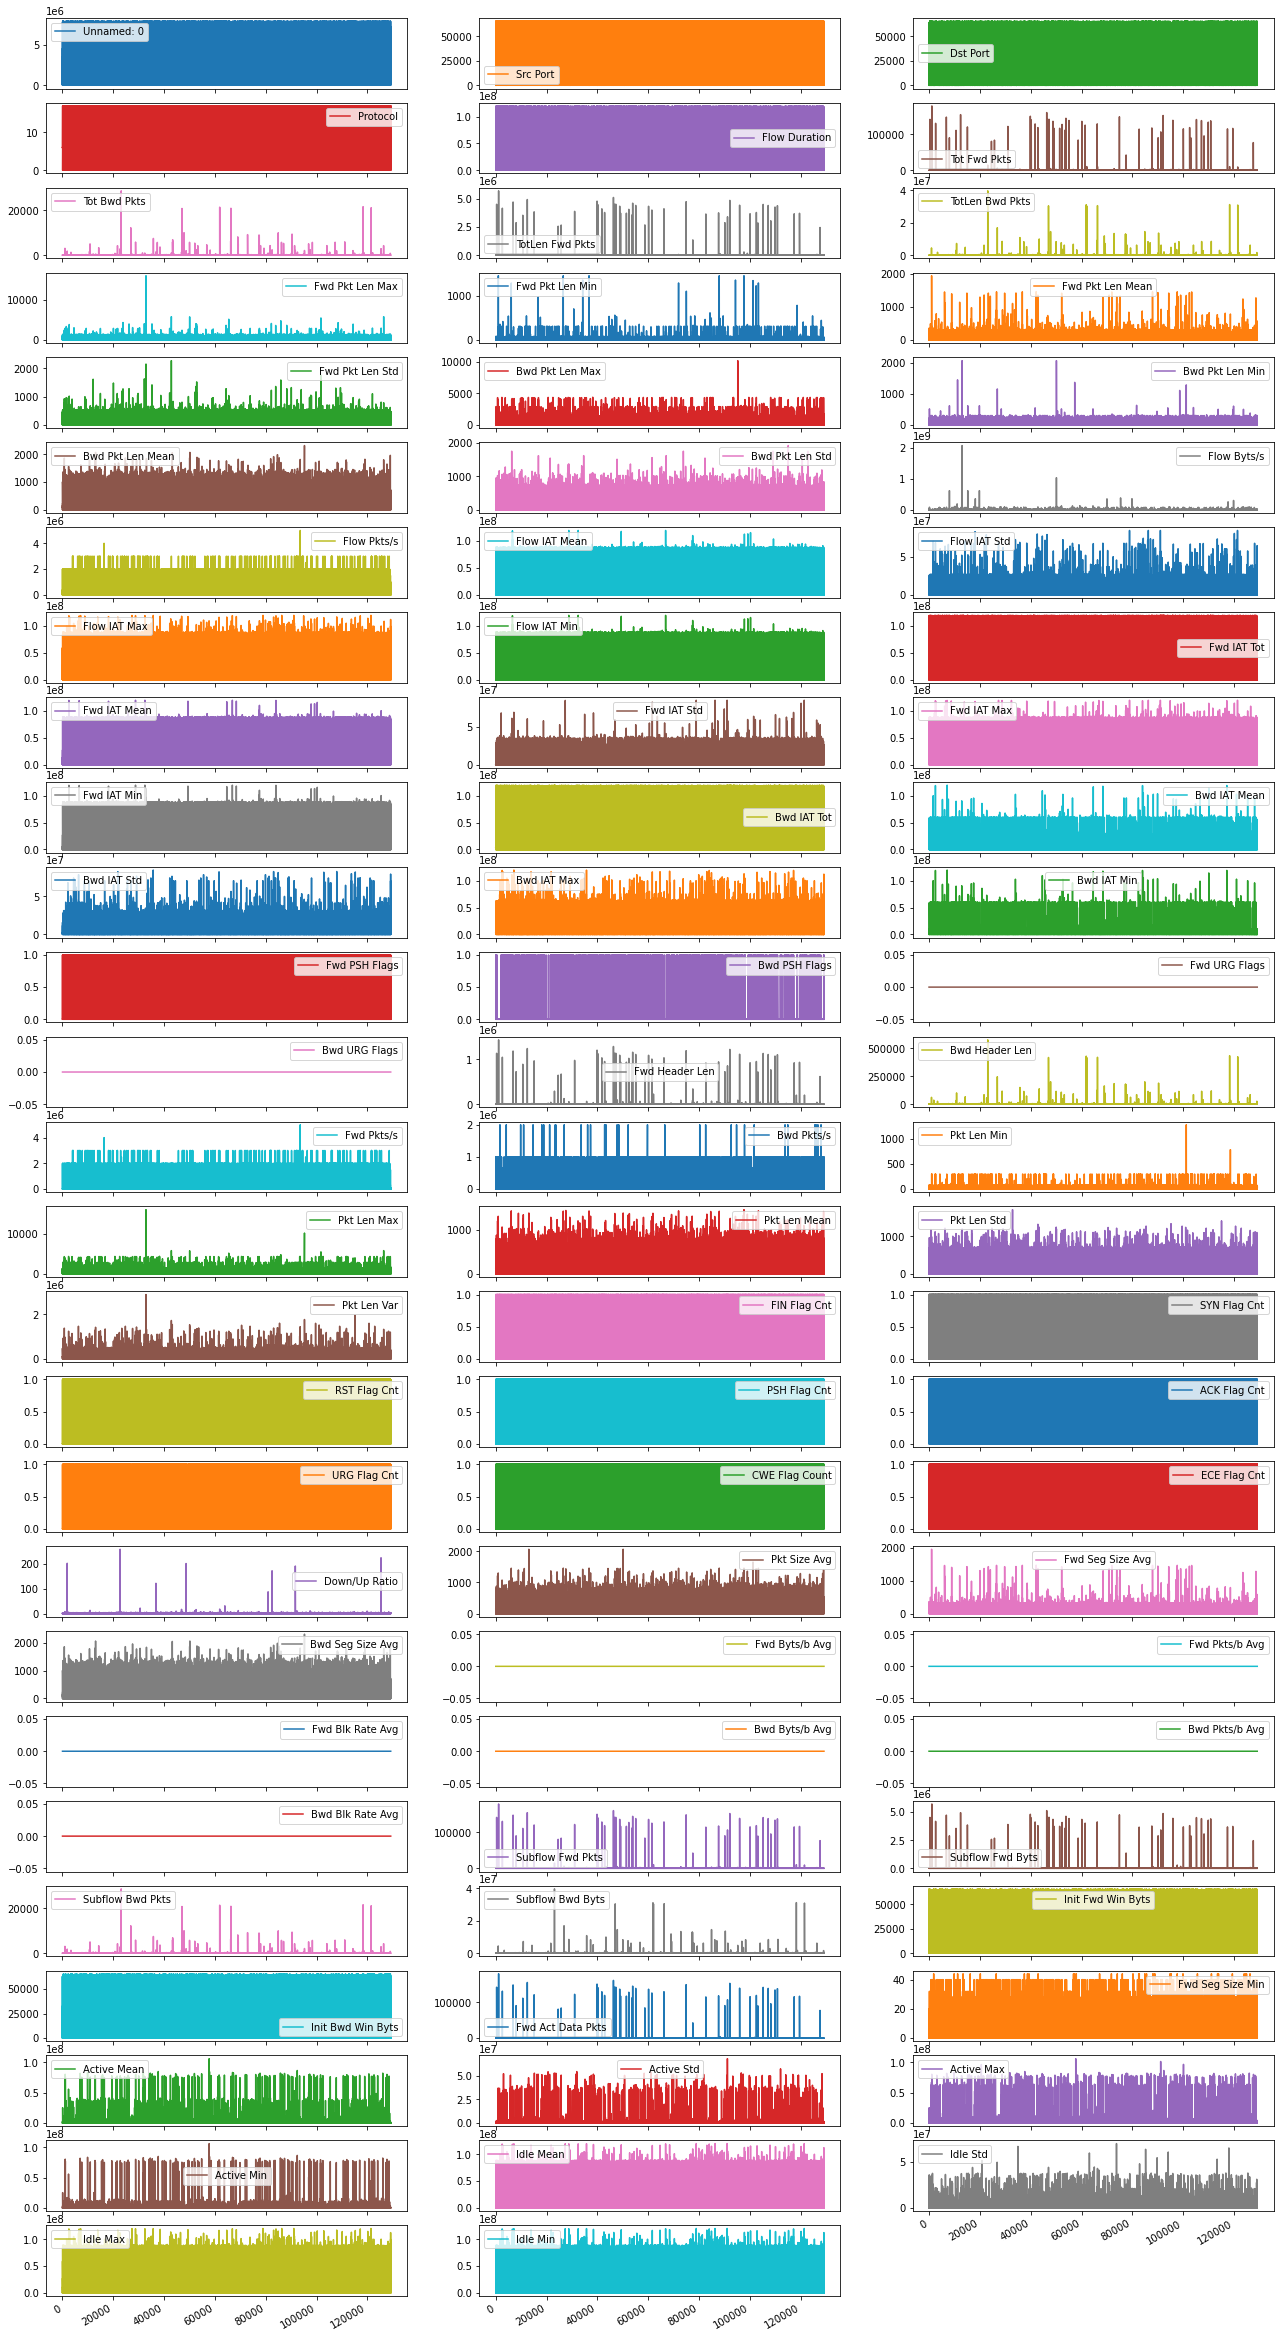

In [34]:
plotDf(df2, (29,3))

In [19]:
df2[['FIN Flag Cnt', 'SYN Flag Cnt','RST Flag Cnt', 'PSH Flag Cnt', 
     'ACK Flag Cnt', 'URG Flag Cnt','CWE Flag Count', 'ECE Flag Cnt']].apply(pd.Series.value_counts)

FIN Flag Cnt  SYN Flag Cnt  RST Flag Cnt  PSH Flag Cnt  ACK Flag Cnt  \
0        254280        223257        229500        205941        127143   
1          4024         35047         28804         52363        131161   

   URG Flag Cnt  CWE Flag Count  ECE Flag Cnt  
0        253300          236498        207968  
1          5004           21806         50336

In [25]:
df[empties1].apply(pd.Series.value_counts)

KeyboardInterrupt: 

In [59]:
df2['Timestamp'].iloc[0]

'16/02/2018 11:17:23 PM'

In [73]:
pd.to_datetime(df2['Timestamp'].iloc[0])

Timestamp('2018-02-16 23:17:23')

In [26]:
# a = df2[['Timestamp']].apply(pd.to_datetime).apply(pd.Timestamp)

In [20]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize= 18)
    plt.yticks(range(len(corr.columns)), corr.columns, fontsize= 18)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for ', fontsize=15)
    plt.show()
    
    
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    
    
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 100, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

def Metriks_Multi(model, history, x_test, y_test, thresh=99, class_names=[0,1,2], loss='loss', val_loss='val_loss', acc='acc', val_acc='val_acc', fileName=""):
    sns.set_style('dark')
    history_dict = history
    # history_dict.keys()

    evalulation = model.evaluate(x_test, y_test)
    
    for i, ele in enumerate(evalulation):
        print("Model Evaluation:", str(model.metrics_names[i]) + " ~ %.2f%%" % (ele * 100.0))
    ## force to binary behavior
    y_pred_ = []
    y_pred = model.predict(x_test)
    if thresh != 99:
        y_pred[y_pred < thresh] = class_names[0]
        y_pred[y_pred >= thresh] = class_names[1]
        y_pred_ = y_pred
    else:
        for i in range(0,len(y_pred)):
            y_pred_.append(np.argmax(y_pred[i]))
    print("-"*90)
    print(classification_report(y_test, y_pred))
    print("-"*90)
    
    accuracy = accuracy_score(y_test, y_pred_)
    # print("Accuracy: %.2f%%" % (accuracy * 100.0))
    
    cnf_matrix = confusion_matrix(y_test, y_pred_, labels=class_names)
    
    plotloss(history_dict, loss, val_loss, fileName=fileName)
    plotacc(history_dict, acc, val_acc, fileName=fileName)
    
    plt.rcdefaults()
    plot_confusion_matrix(cnf_matrix, classes=list(map(str, class_names)), title='Confusion matrix', fileName=fileName)
    

    return [model.metrics_names, evalulation, y_pred_, classification_report(y_test, y_pred, output_dict=True), cnf_matrix]


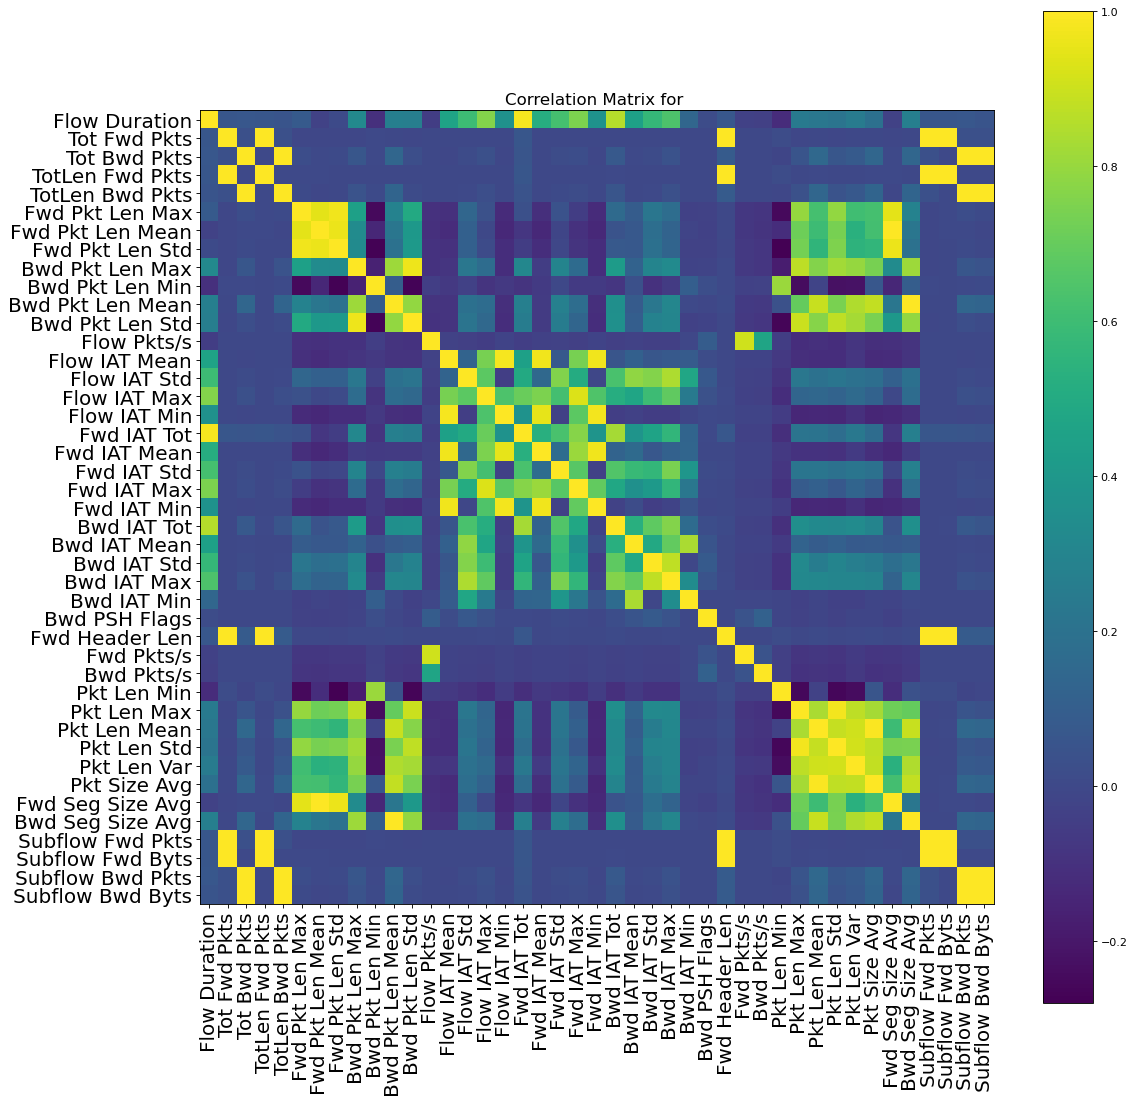

In [191]:
# rr = df2[['FIN Flag Cnt', 'SYN Flag Cnt','RST Flag Cnt', 'PSH Flag Cnt', 
#      'ACK Flag Cnt', 'URG Flag Cnt','CWE Flag Count', 'ECE Flag Cnt']]
plotCorrelationMatrix(df3, 16)

In [22]:
df4 = df3[['Pkt Len Min', 'Bwd PSH Flags', 'Bwd Pkt Len Min', 
'Flow IAT Std', 'Flow IAT Max', #'Flow IAT Min', 'Flow IAT Mean', 'Fwd IAT Mean', 'Fwd IAT Min'
'Fwd IAT Tot', 'Fwd IAT Std', 'Fwd IAT Max',
'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Label']]

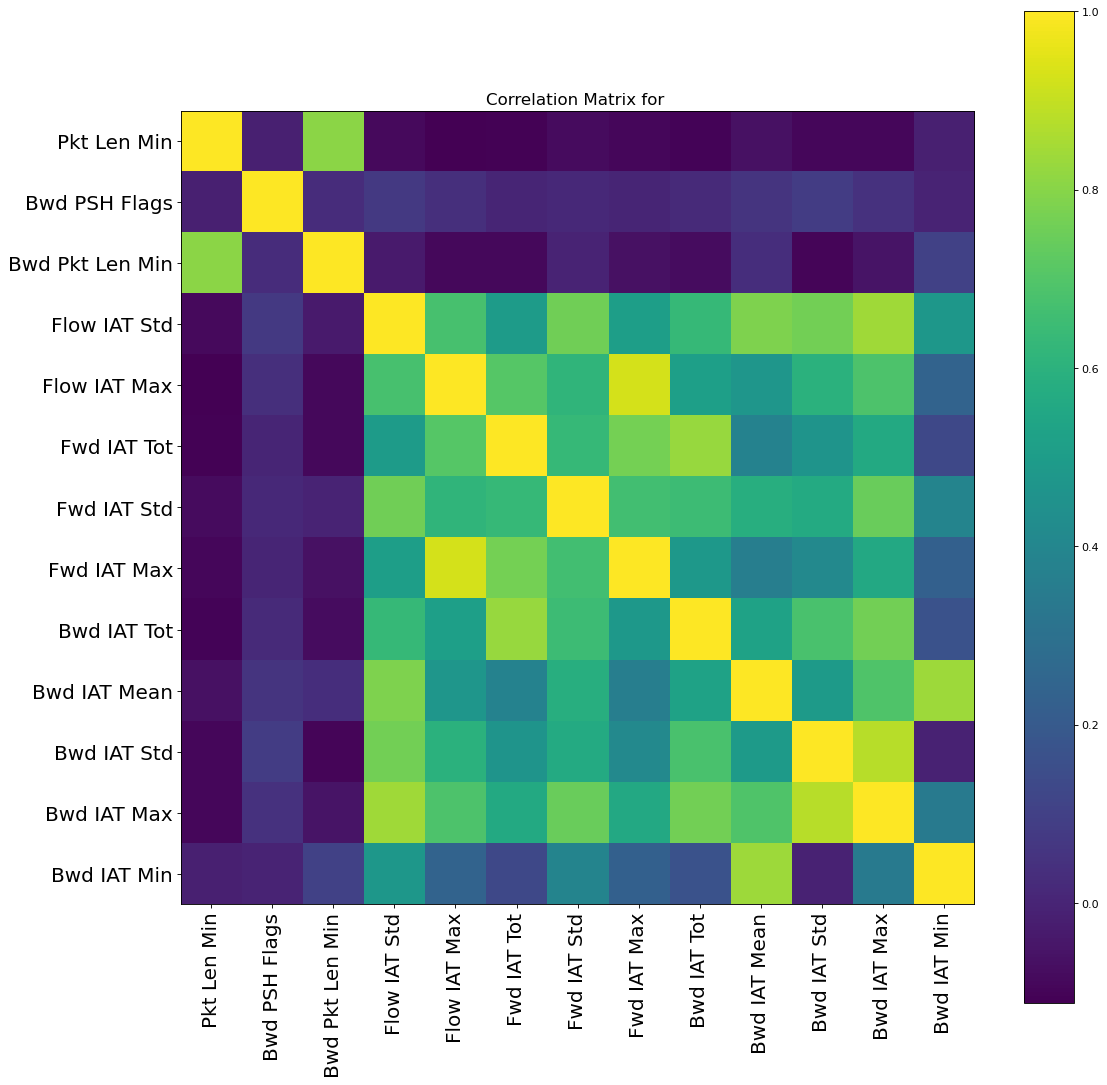

In [211]:
plotCorrelationMatrix(df4, 16)

In [196]:
[x for x in list(df2.columns) if x not in list(empties1)]

['Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Flow Pkts/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Bwd PSH Flags',
 'Fwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'Pkt Len Var',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Subflow Fwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Bwd Byts',
 'Label']

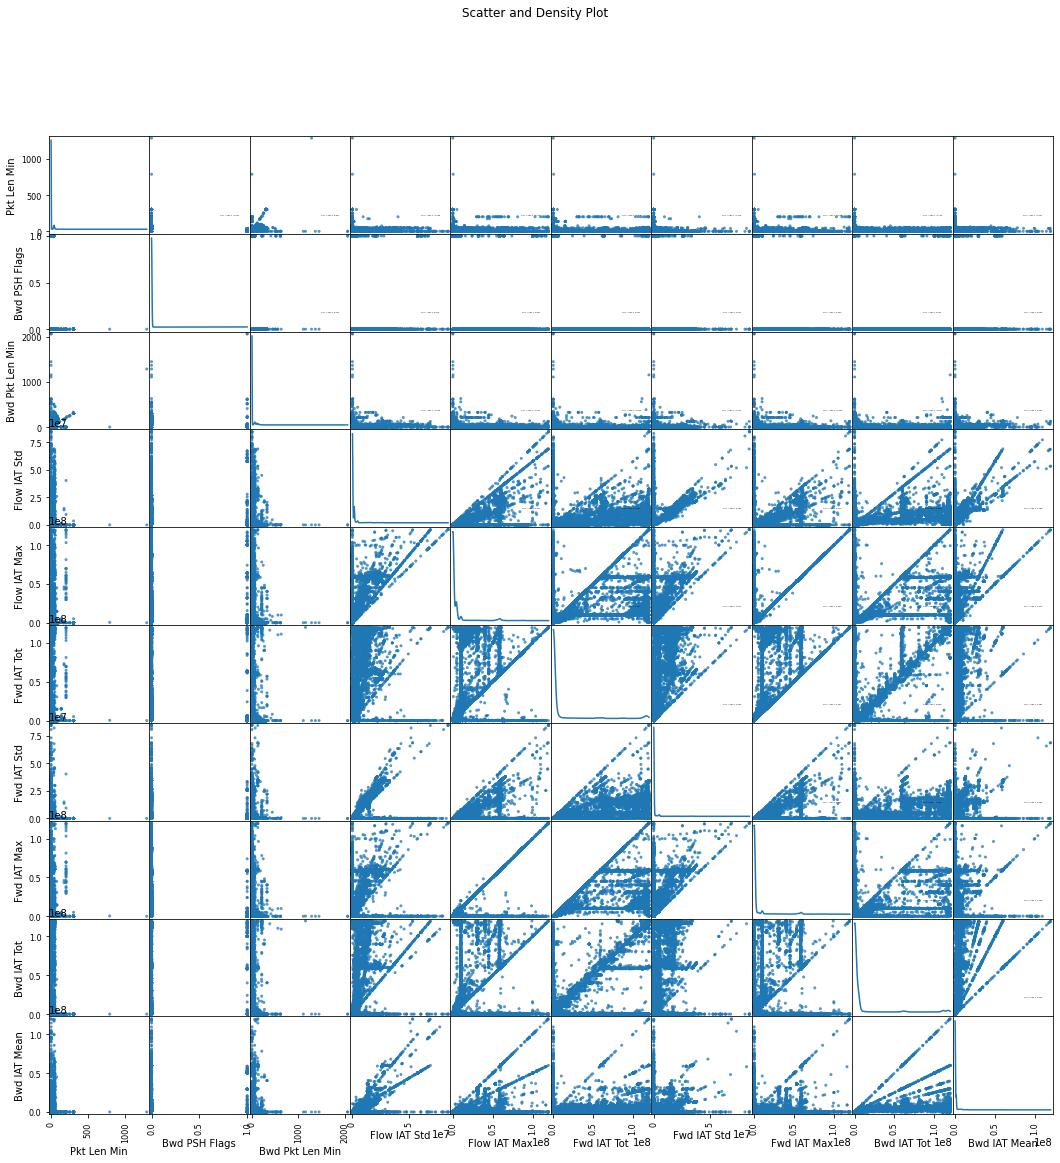

In [203]:
plotScatterMatrix(df4, 18, 2)

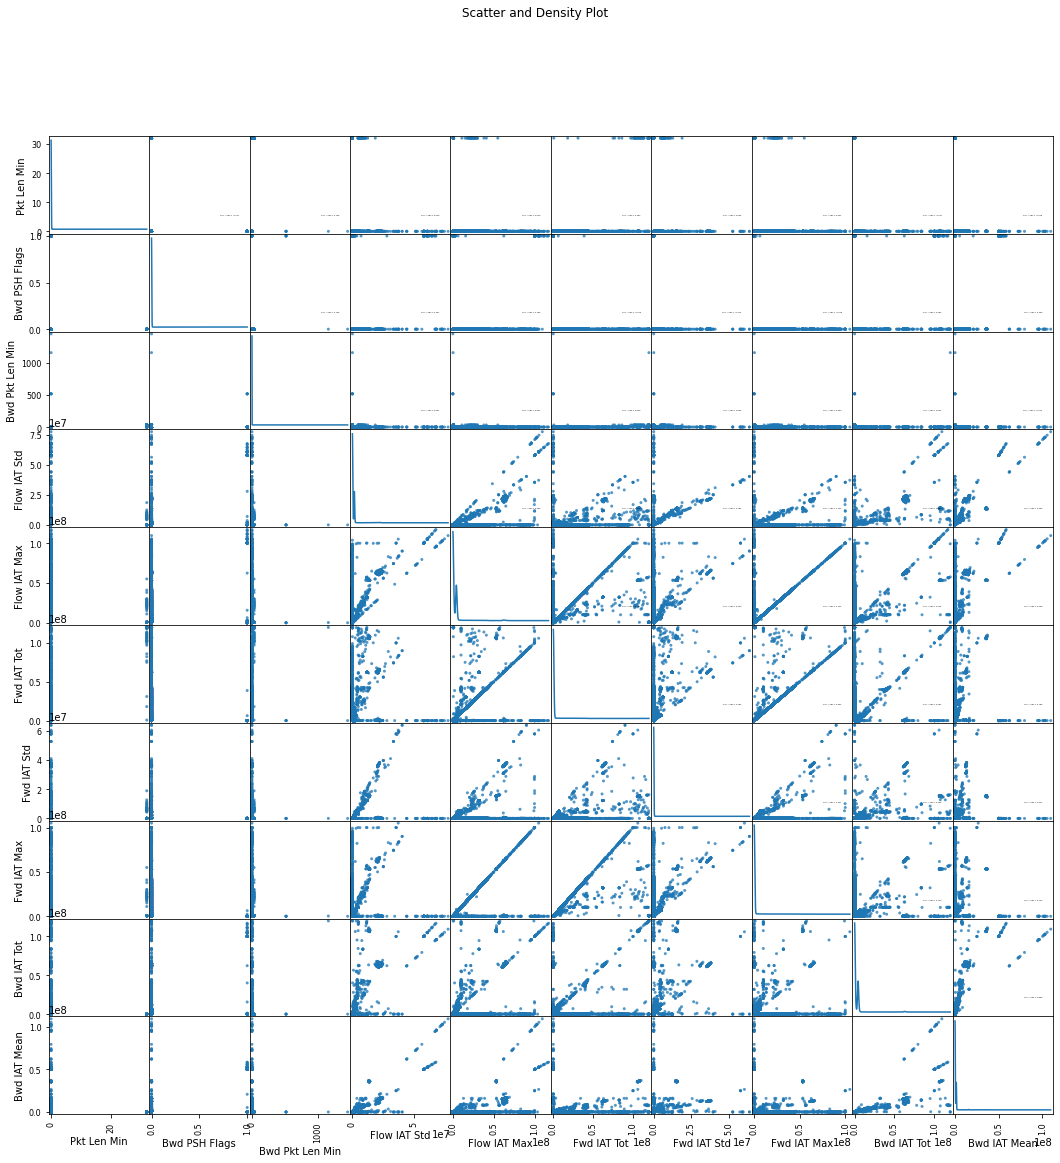

In [215]:
plotScatterMatrix(df4[df4.Label == 'ddos'], 18, 2)

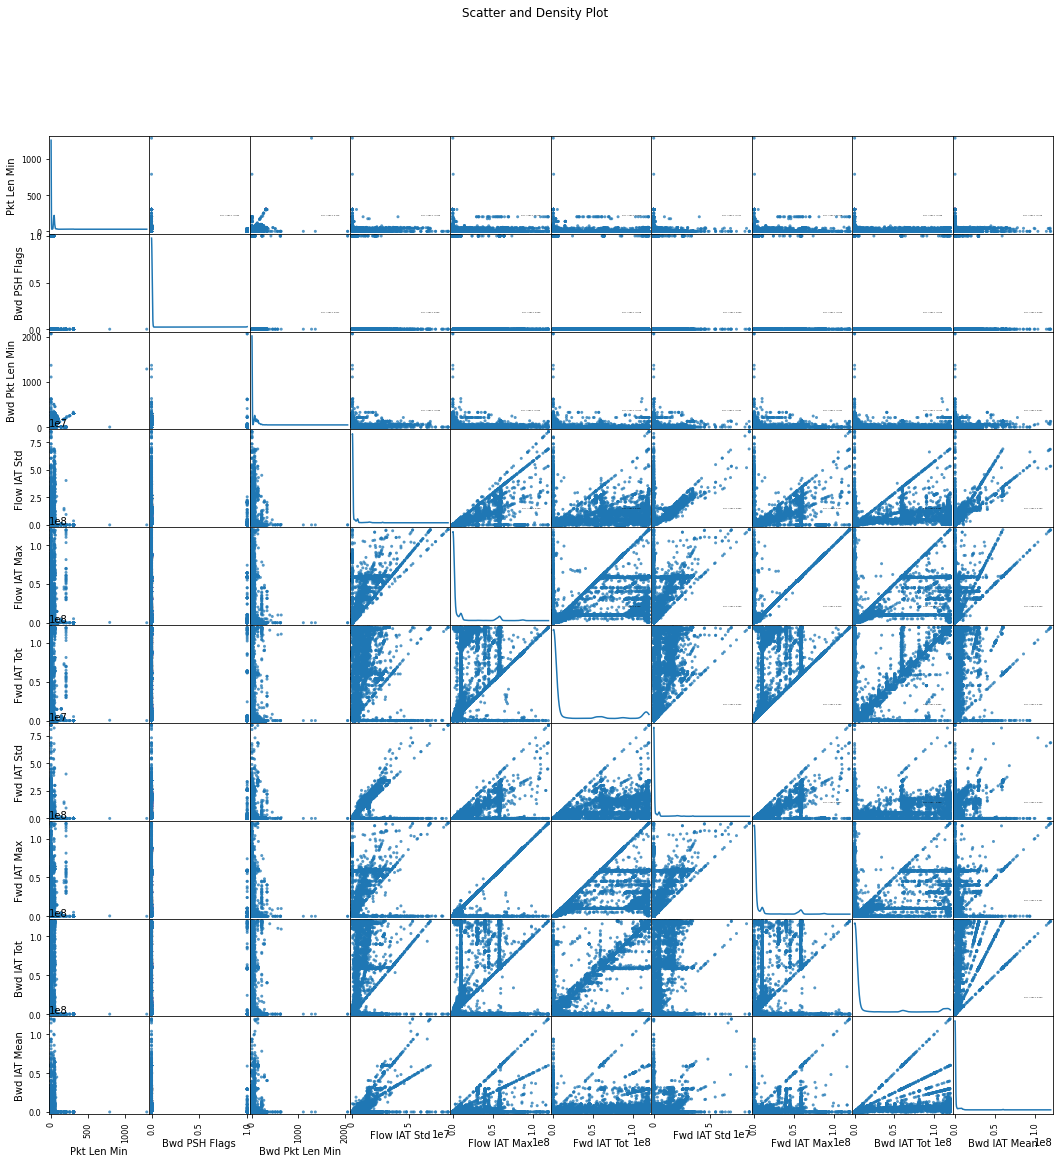

In [216]:
plotScatterMatrix(df4[df4.Label == 'Benign'], 18, 2)

In [ ]:
plotPerColumnDistribution(df2, 8, 4)

In [23]:
df5 = df4[['Flow IAT Max', 'Fwd IAT Tot', 'Fwd IAT Max', 'Bwd IAT Tot', 'Label']].reset_index(drop=True)

In [336]:
a = df5.apply(pd.to_numeric, errors='coerce')

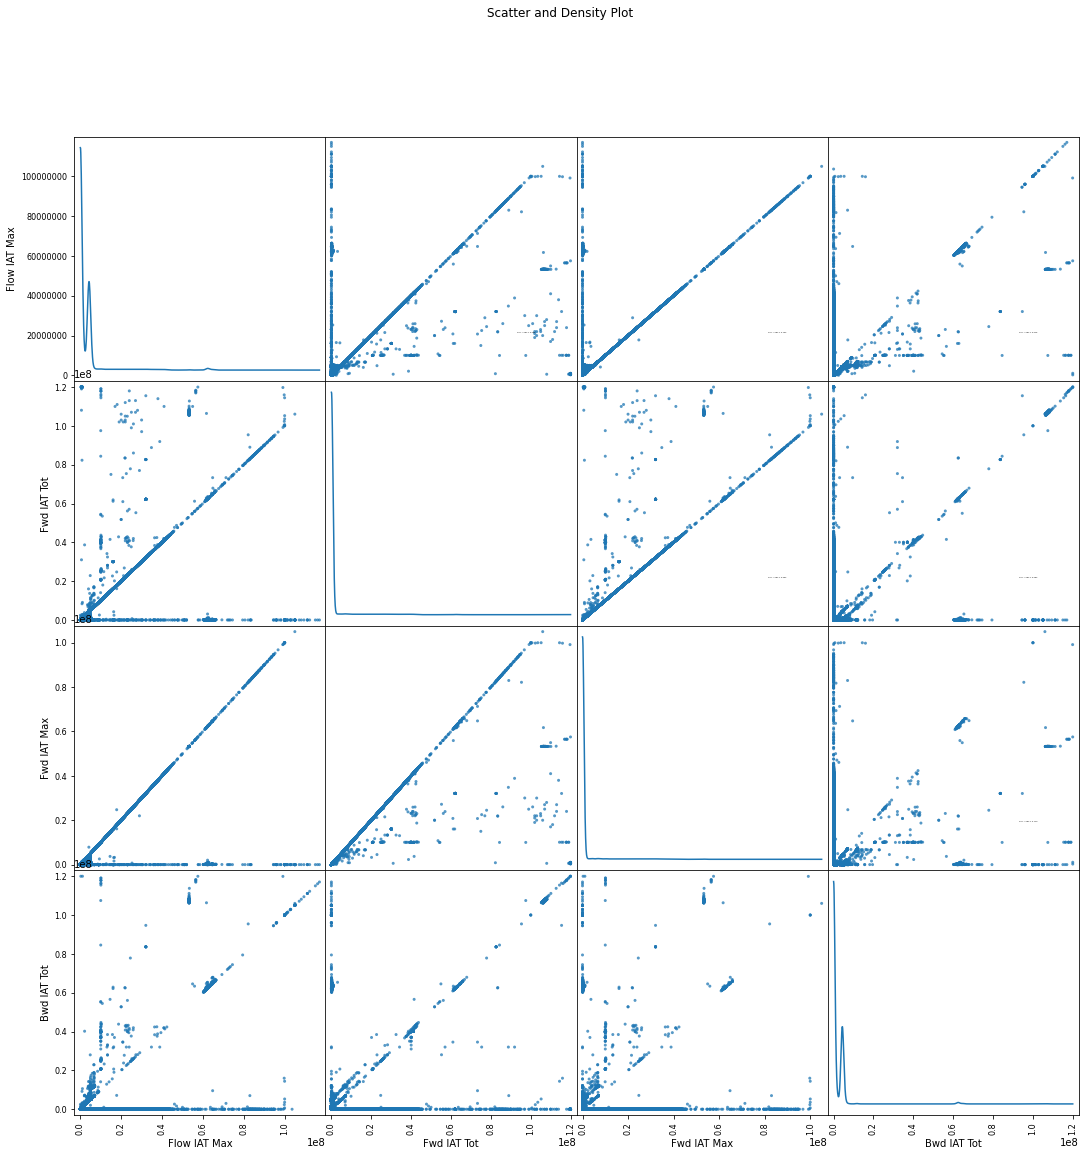

In [339]:
plotScatterMatrix(df5[df5.Label == 'ddos'], 18, 2)
plt.show()

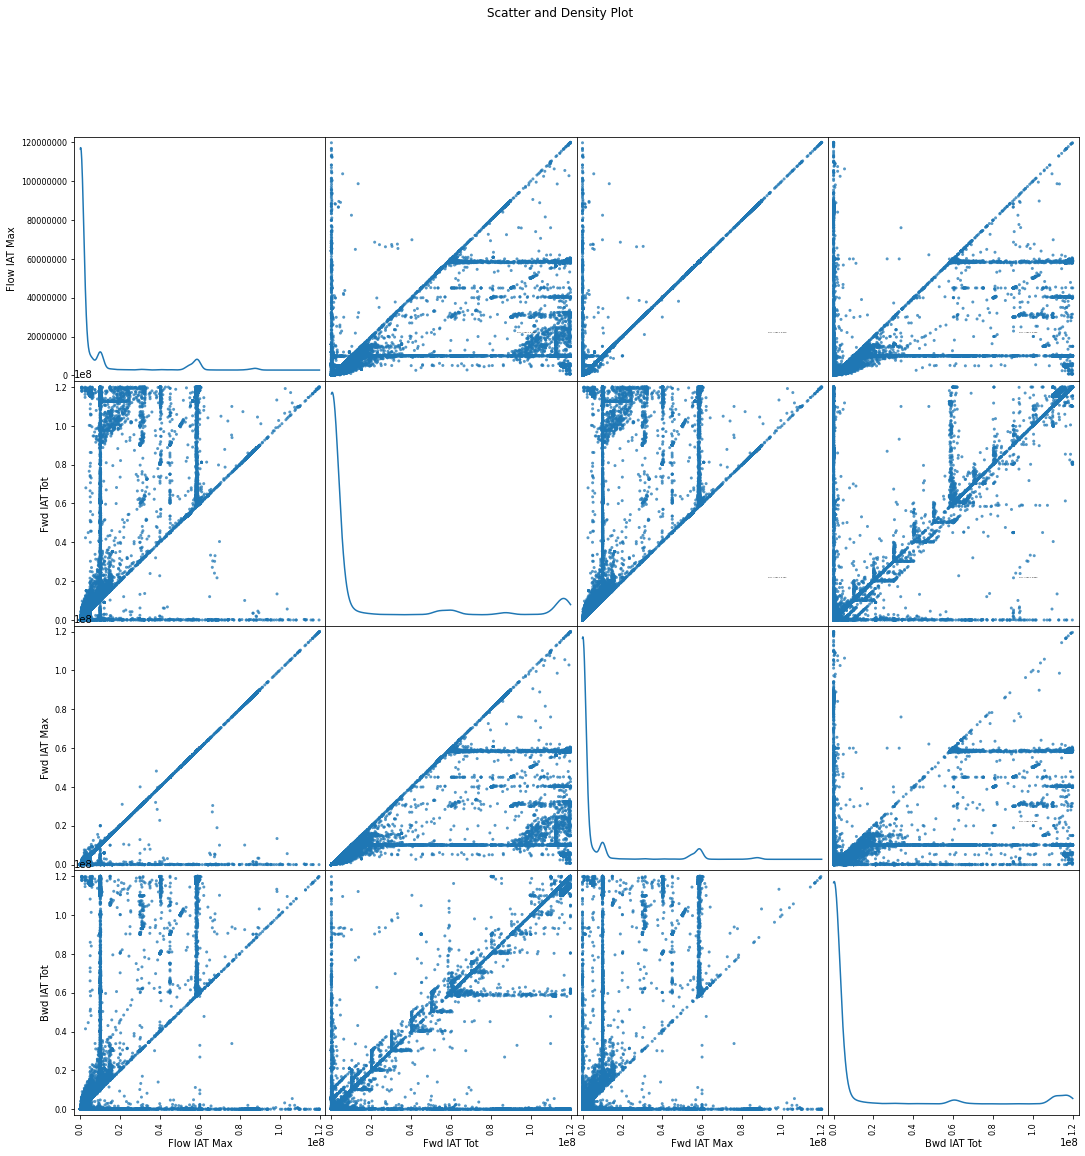

In [340]:
plotScatterMatrix(df5[df5.Label == 'Benign'], 18, 2)
plt.show()

# Training

In [24]:
from sklearn import svm
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [25]:
df5

Flow IAT Max  Fwd IAT Tot  Fwd IAT Max  Bwd IAT Tot   Label
0          3978389.0      97011.0      54875.0    4033267.0    ddos
1            41908.0          0.0          0.0          0.0    ddos
2            14052.0          0.0          0.0          0.0    ddos
3          3237488.0      76877.0      60571.0    3298065.0    ddos
4            92681.0      93594.0      92998.0      92998.0    ddos
...              ...          ...          ...          ...     ...
258299    10010237.0   45389692.0   10031059.0   40124019.0  Benign
258300     1223084.0    2711870.0    1223084.0    2591934.0  Benign
258301      140249.0          0.0          0.0     140253.0  Benign
258302    56318626.0  112637195.0   56318626.0          0.0  Benign
258303         328.0          0.0          0.0          0.0  Benign

[258304 rows x 5 columns]

In [26]:
def standardDevNormalization(array):
    result = []
    vstd = array.std()
    vmean = array.mean()
    
    for i, v_i in enumerate(array):
        result.append((v_i - vmean)/(2*vstd))
    return result

In [27]:
# df5.loc[:, df5.columns != 'Label'].apply(standardDevNormalization).describe()

In [28]:
# df6 = normalize(df5.loc[:, df5.columns != 'Label'])
df6 = df5.loc[:, df5.columns != 'Label'].apply(standardDevNormalization)

In [29]:
df6.values

array([[-0.0147042 , -0.14499248, -0.13493321, -0.04211703],
       [-0.16557596, -0.14695976, -0.1371467 , -0.1358634 ],
       [-0.16664359, -0.14695976, -0.1371467 , -0.1358634 ],
       ...,
       [-0.16180689, -0.14695976, -0.1371467 , -0.13260346],
       [ 1.99131685,  2.13721038,  2.13457266, -0.1358634 ],
       [-0.16716958, -0.14695976, -0.1371467 , -0.1358634 ]])

In [30]:
df5.Label = df.Label.map({'ddos':0, 'Benign':1})
df5.Label.iloc[0]

0

In [38]:
x = df6.values
y = df5.Label.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=42)

In [39]:
len(x_train)

12915

In [43]:
# params = {'max_iter': 10, 'verbose':True}

In [33]:
# model = svm.SVC(cache_size=7000, verbose=True)#kernel='rbf')
model = make_pipeline(StandardScaler(), svm.SVC(gamma='auto'))

In [34]:
model.fit(x_train, y_train.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [35]:
model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [117]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(x_train, y_train) 

TypeError: __init__() got an unexpected keyword argument 'cache_size'

In [116]:
clf.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [83]:
model2 = svm.SVR(max_iter=2000, verbose=True)#kernel='rbf')

In [84]:
model2.fit(x_train, y_train)

[LibSVM]

SVR(max_iter=2000, verbose=True)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)



# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# scores = ['precision', 'recall', 'f1']
scores = ['f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(cache_size=16000), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for f1



In [ ]:
8